<a href="https://colab.research.google.com/github/LuisSilvaS/Data-science/blob/main/Crime_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [3]:
import os

In [4]:
df = pd.read_csv('/content/rec-crime-pfa.csv' )

In [5]:
df.sample(10)

,12 months ending,PFA,Region,Offence,Rolling year total number of offences
14461,31/03/2010,Humberside,Yorkshire and The Humber,Bicycle theft,2573
18754,30/06/2011,Essex,East,Shoplifting,9396
9802,31/12/2008,Cleveland,North East,Criminal damage and arson,14463
44858,30/09/2018,Dyfed-Powys,Wales,Possession of weapons offences,153
12713,30/09/2009,Humberside,Yorkshire and The Humber,Sexual offences,1004
6204,31/12/2007,British Transport Police,British Transport Police,Domestic burglary,4
11953,30/06/2009,Metropolitan Police,London,Sexual offences,8575
36366,30/06/2016,Cheshire,North West,Non-residential burglary,0
27155,30/09/2013,Surrey,South East,Miscellaneous crimes against society,955
22480,30/06/2012,Lincolnshire,East Midlands,Miscellaneous crimes against society,621


In [6]:
df.tail(5)

,12 months ending,PFA,Region,Offence,Rolling year total number of offences
46464,31/12/2018,Wiltshire,South West,Stalking and harassment,2380
46465,31/12/2018,Wiltshire,South West,Theft from the person,347
46466,31/12/2018,Wiltshire,South West,Vehicle offences,2895
46467,31/12/2018,Wiltshire,South West,Violence with injury,5701
46468,31/12/2018,Wiltshire,South West,Violence without injury,5840


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46469 entries, 0 to 46468
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   12 months ending                       46469 non-null  object
 1   PFA                                    46469 non-null  object
 2   Region                                 46469 non-null  object
 3   Offence                                46469 non-null  object
 4   Rolling year total number of offences  46469 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [8]:
df.isnull().any().any()

False

In [9]:
df.nunique()

12 months ending                            52
PFA                                         47
Region                                      14
Offence                                     25
Rolling year total number of offences    13638
dtype: int64

In [10]:
df['12 months ending'] = pd.to_datetime(df['12 months ending'])
df['Year'] = df['12 months ending'].dt.year
df['Month'] = df['12 months ending'].dt.month
df['Day'] = df['12 months ending'].dt.year
df['Day of week'] = df['12 months ending'].dt.dayofweek
df['Week of year'] = df['12 months ending'].dt.weekofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [11]:
df.sample(5)

,12 months ending,PFA,Region,Offence,Rolling year total number of offences,Year,Month,Day,Day of week,Week of year
37560,2016-09-30,Hertfordshire,East,Criminal damage and arson,9310,2016,9,2016,4,39
28775,2014-03-31,Northumbria,North East,Sexual offences,1166,2014,3,2014,0,14
21819,2012-03-31,Staffordshire,West Midlands,Possession of weapons offences,329,2012,3,2012,5,13
26217,2013-06-30,South Yorkshire,Yorkshire and The Humber,Sexual offences,906,2013,6,2013,6,26
14995,2010-06-30,Bedfordshire,East,Stalking and harassment,437,2010,6,2010,2,26


In [12]:
df = df.rename(columns={'Rolling year total number of offences':'Total crimes'})

In [13]:
for col in ['PFA','Region','Offence']:
    print('Unique values for {0}:'.format(col))
    print(df[col].unique())
    

Unique values for PFA:
['Avon and Somerset' 'Bedfordshire' 'British Transport Police'
 'Cambridgeshire' 'Cheshire' 'City of London' 'Cleveland' 'Cumbria'
 'Derbyshire' 'Devon and Cornwall' 'Dorset' 'Durham' 'Dyfed-Powys' 'Essex'
 'Gloucestershire' 'Greater Manchester' 'Gwent' 'Hampshire'
 'Hertfordshire' 'Humberside' 'Kent' 'Lancashire' 'Leicestershire'
 'Lincolnshire' 'Merseyside' 'Metropolitan Police' 'Norfolk' 'North Wales'
 'North Yorkshire' 'Northamptonshire' 'Northumbria' 'Nottinghamshire'
 'South Wales' 'South Yorkshire' 'Staffordshire' 'Suffolk' 'Surrey'
 'Sussex' 'Thames Valley' 'Warwickshire' 'West Mercia' 'West Midlands'
 'West Yorkshire' 'Wiltshire' 'Action Fraud' 'CIFAS' 'UK Finance']
Unique values for Region:
['South West' 'East' 'British Transport Police' 'North West' 'London'
 'North East' 'East Midlands' 'Wales' 'South East'
 'Yorkshire and The Humber' 'West Midlands' 'Fraud: Action Fraud'
 'Fraud: CIFAS' 'Fraud: UK Finance']
Unique values for Offence:
['All other thef

In [14]:
for elem in df['Offence'].unique():
    print(elem)

All other theft offences
Bicycle theft
Criminal damage and arson
Death or serious injury caused by illegal driving
Domestic burglary
Drug offences
Fraud offences
Homicide
Miscellaneous crimes against society
Non-domestic burglary
Possession of weapons offences
Public order offences
Robbery
Sexual offences
Shoplifting
Stalking and harassment
Theft from the person
Vehicle offences
Violence with injury
Violence without injury
Action Fraud
CIFAS
UK Finance
Non-residential burglary
Residential burglary


In [15]:
df.loc[df['Offence'].isin(['Domestic burglary','Non-residential burglary','Residential burglary','Non-domestic burglary']), 'Offence'] = 'Burglary'
df.loc[df['Offence'].isin(['All other theft offences','Bicycle theft','Shoplifting','Theft from the person']), 'Offence'] = 'Thieviery'
df.loc[df['Offence'].isin(['Violence with injury','Violence without injury']), 'Offence'] = 'Violence'

In [16]:
del df['12 months ending']

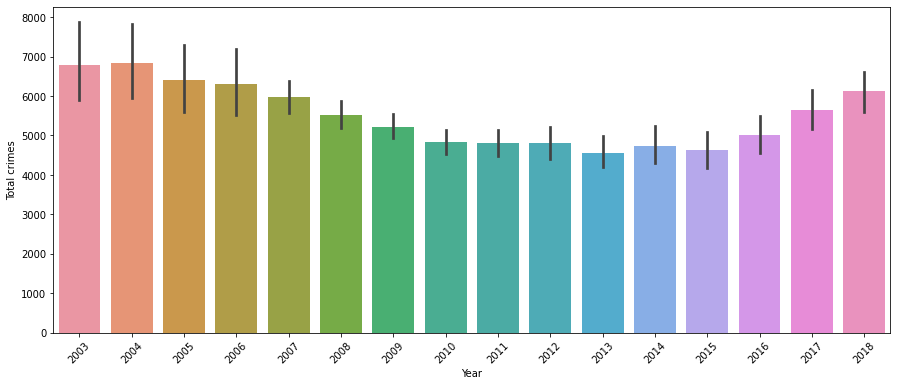

In [17]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x='Year', y='Total crimes', data=df)
plt.xticks(rotation=45,fontsize=10)
plt.show()

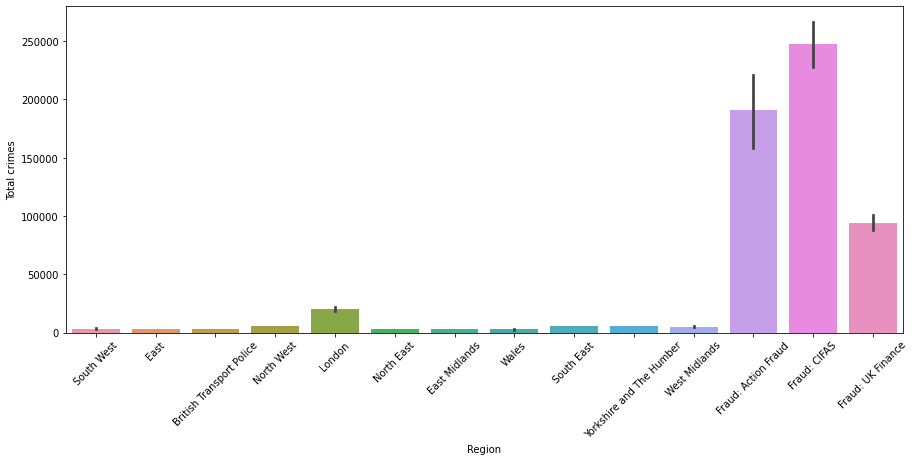

In [18]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x='Region', y='Total crimes', data=df)
plt.xticks(rotation=45,fontsize=10)
plt.show()

In [19]:
df_temp = df[-df['Region'].isin(['Fraud: Action Fraud','Fraud: CIFAS','Fraud: UK Finance'])]

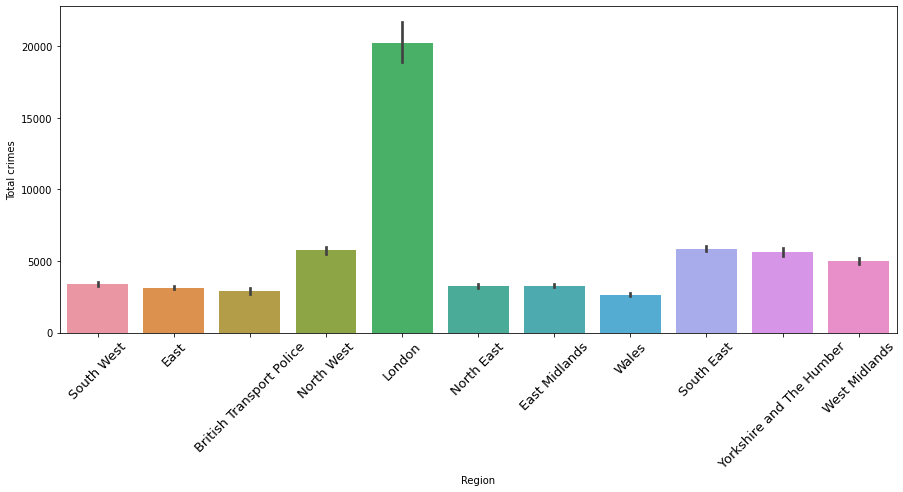

In [20]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x='Region', y='Total crimes', data=df_temp)
plt.xticks(rotation=45,fontsize=13)
plt.show()

In [21]:
df_london = df[df['Region'] == 'London']

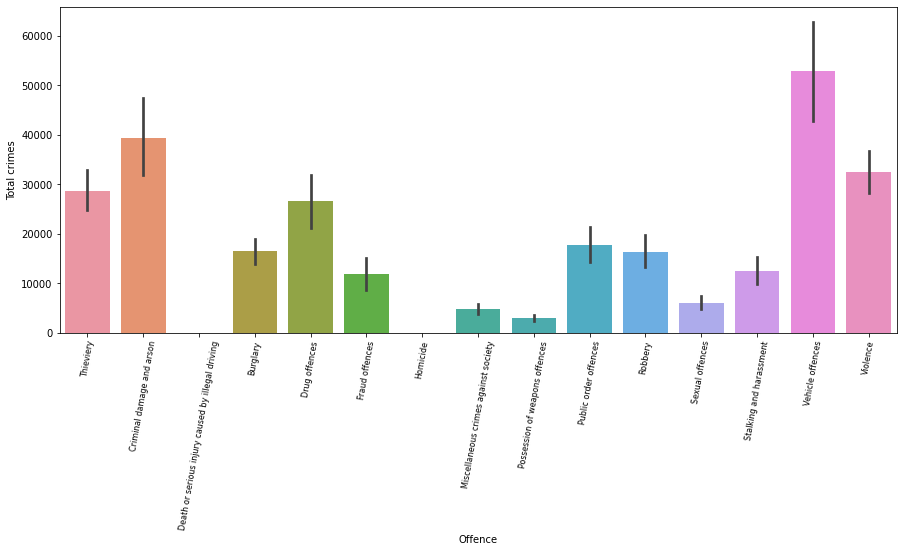

In [22]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x='Offence', y='Total crimes', data=df_london)
plt.xticks(rotation=80,fontsize=8)
plt.show()

In [23]:
offence_list = list(df_london['Offence'].unique())

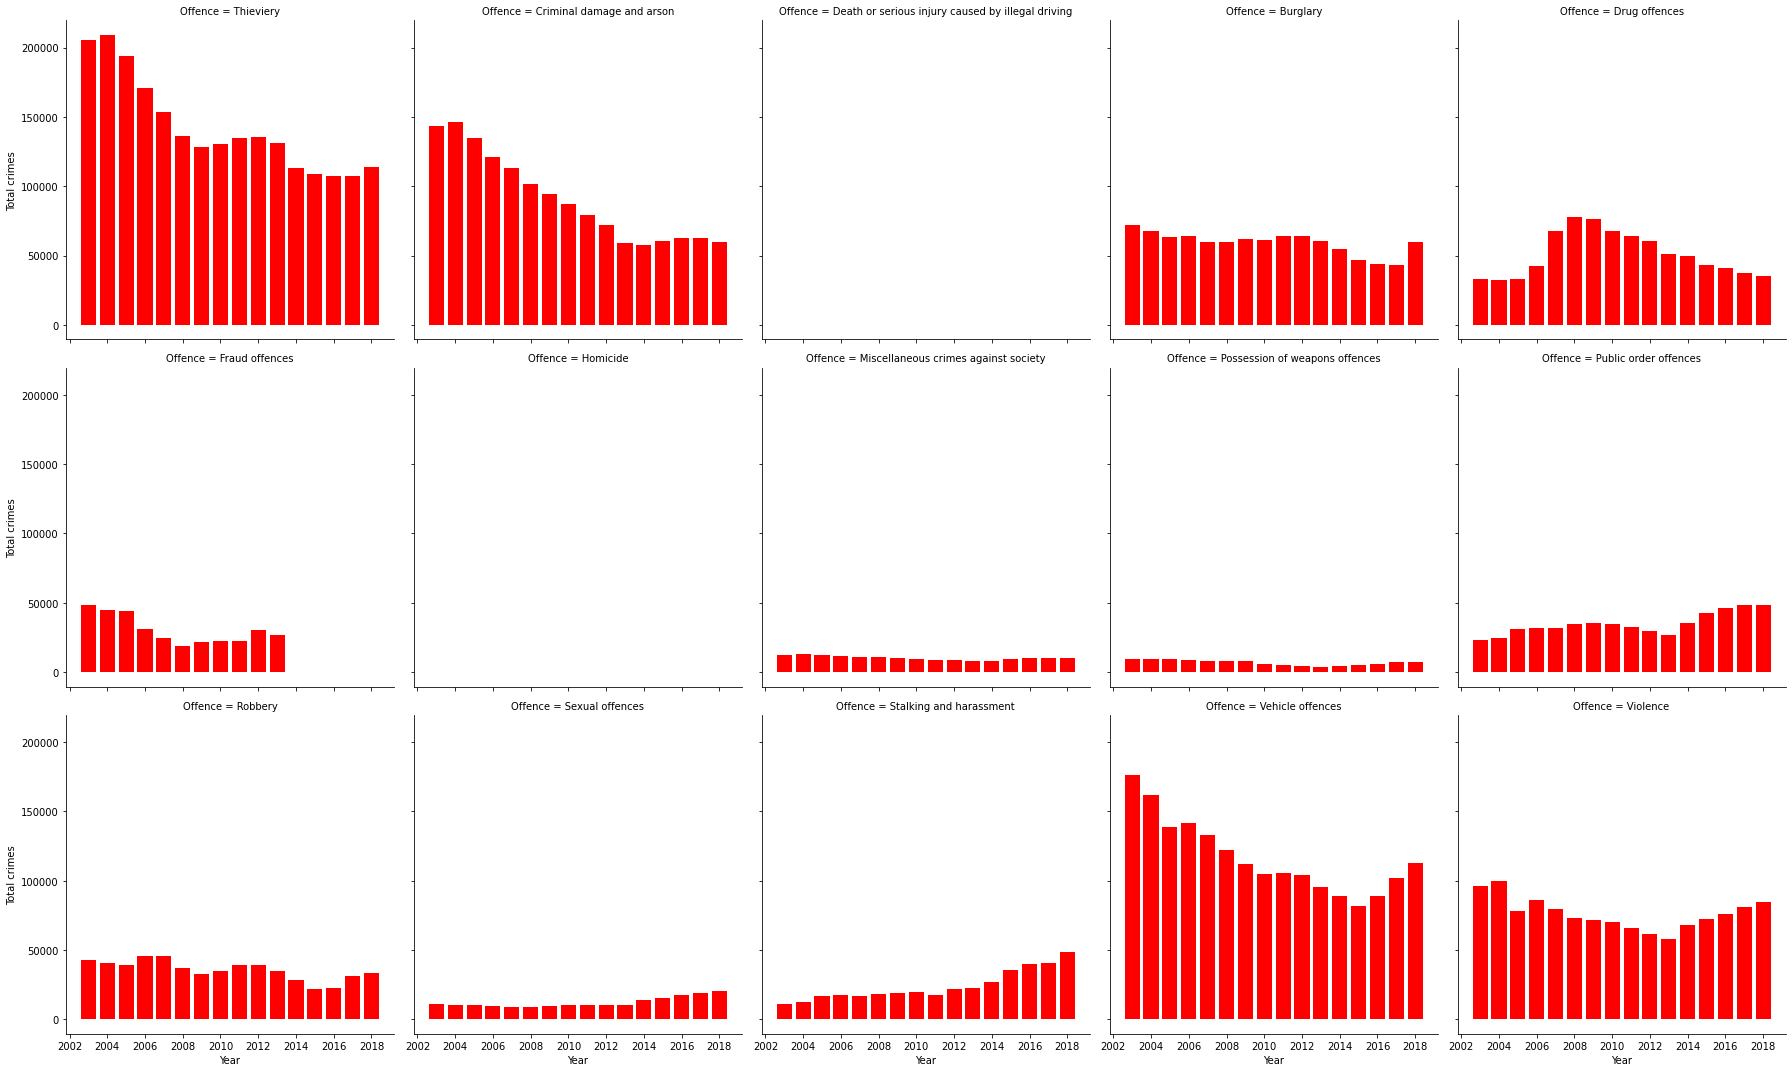

In [24]:
g = sns.FacetGrid(df_london, col = "Offence", height=5,col_wrap=5)
g.map(plt.bar, "Year",'Total crimes', color = 'red')